In [90]:
import numpy as np
import torch
from torch.autograd import Variable
import torchvision
from PIL import Image
from visualizers import FoolingImage

import matplotlib.pyplot as plt

from data_utils import load_imagenet_val
from image_utils import preprocess, deprocess

In [91]:
model = torchvision.models.squeezenet1_1(pretrained=True)

In [92]:
X, y, class_names = load_imagenet_val(num=5)

Text(0.5, 1.0, 'Actual label: Tibetan mastiff')

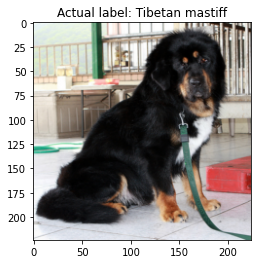

In [93]:
idx = 2
plt.imshow(X[idx])
plt.title(f"Actual label: {class_names[y[idx]]}")

In [95]:
target_y = 99

X_tensor = torch.cat([preprocess(Image.fromarray(x)) for x in X], dim=0)
fi = FoolingImage()
X_fooling = fi.make_fooling_image(X_tensor[idx:idx+1], target_y, model)

scores = model(Variable(X_fooling))

In [96]:
probability_distribution = torch.softmax(scores, dim=1).squeeze()

In [97]:
# Verify that the probability distribution is valid (i.e. between 0 and 1 at all points & sums to 1)
torch.all(0 <= probability_distribution) and torch.all(probability_distribution <= 1)

tensor(True)

Text(0.5, 1.0, 'Probability Distribution of beliefs across classes')

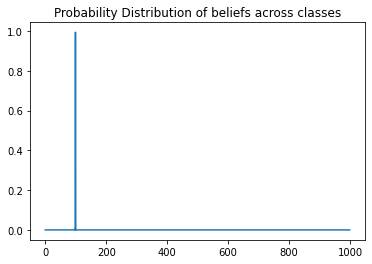

In [98]:
plt.plot(range(len(probability_distribution)), probability_distribution.detach().numpy())
plt.title("Probability Distribution of beliefs across classes")

In [99]:
X_fooling_np = deprocess(X_fooling.clone())
X_fooling_np = np.asarray(X_fooling_np).astype(np.uint8)

Text(0.5, 1.0, 'Adversarial image is labeled as: goose')

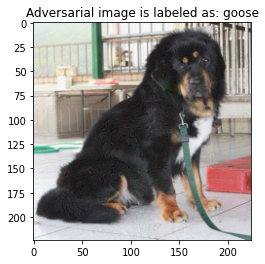

In [100]:
plt.imshow(X_fooling_np)
plt.title(f"Adversarial image is labeled as: {class_names[int(probability_distribution.argmax())]}")

In [ ]:
X_pre = preprocess(Image.fromarray(X[idx]))
diff = np.asarray(deprocess(X_fooling - X_pre))

In [ ]:
plt.imshow(diff)
plt.title('Difference')